## Jupyter Notebook for the creation of mdtraj obtained data plots and PCA/tICA analysis


- First you need to import the important libraries. Maybe you need to add more libraries. Feel free to add them in this first cell
- Then you can load the functions that will be used later on. Nice_PES ia a function for plotting FEL plots in a nice way


In [1]:
# Useful stuff
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
#import pytraj as pt
import glob
import pickle

# PyEmma
import pyemma
import pyemma.msm as msm
import pyemma.plots
import pyemma.coordinates as coor
import gc

# 1 - Discretization

I start by defining the input files names and the input coordinates

In [4]:
directory= '/Volumes/Nia_HardDrive/HGs/TRAJS/'


trajfiles_HG3_apo=[fi for fi in glob.glob(directory + 'HG3_APO/'+ '*super.dcd')]
topfile_HG3_apo= directory + 'TOPS/hg3_apo.pdb'

trajfiles_HG317shell_apo=[fi for fi in glob.glob(directory +'HG317shell_APO/'+  '*super.dcd')]
topfile_HG317shell_apo= directory+'/TOPS/hg317_shell_apo.pdb'

trajfiles_HG4_apo=[fi for fi in glob.glob(directory + 'HG4_APO/'+ '*super.dcd')]
topfile_HG4_apo=directory+'/TOPS/hg4_apo.pdb'

trajfiles_HG317_apo=[fi for fi in glob.glob(directory + 'HG317_APO/'+ '*super.dcd')]
topfile_HG317_apo=directory+'/TOPS/hg317_apo.pdb'

In [5]:
trajfiles = []
trajfiles.append(trajfiles_HG3_apo)
trajfiles.append(trajfiles_HG317_apo)
trajfiles.append(trajfiles_HG317shell_apo)
trajfiles.append(trajfiles_HG4_apo)


topfiles = []
topfiles.append(topfile_HG3_apo)
topfiles.append(topfile_HG317_apo)
topfiles.append(topfile_HG317shell_apo)
topfiles.append(topfile_HG4_apo)


In [6]:
topology_hg3=md.load(topfiles[0]).top
topology_hg317=md.load(topfiles[1]).top
topology_hg317shell=md.load(topfiles[2]).top
topology_hg4=md.load(topfiles[3]).top


## Analysis:

We normaly organize the data as the following: 
- FEATS are the lists variables that contains the data that will be used to extract info from the MD's (only based in the topfile). Feats list contain the feats for all systems. ej: feat1 == feats[0]
- SOURCES are the arrays containing the values of the feats for all frames

# Featurization

In [5]:
### HG3_apo
feat1=pyemma.coordinates.featurizer(topfiles[0])
heavy_hg3_bb=feat1.select('resid 0 to 298 and backbone')
feat1.add_selection(heavy_hg3_bb)

#### HG317_apo

feat2=pyemma.coordinates.featurizer(topfiles[1])
heavy_hg317_bb=feat2.select('resid 0 to 298 and backbone')
feat2.add_selection(heavy_hg317_bb)

#### HG317_shell_apo

feat3=pyemma.coordinates.featurizer(topfiles[2])
heavy_hg317shell_bb=feat3.select('resid 0 to 298 and backbone')
feat3.add_selection(heavy_hg317shell_bb)

# ### HG4_apo

feat4=pyemma.coordinates.featurizer(topfiles[3])
heavy_hg4_bb=feat4.select('resid 0 to 298 and backbone')
feat4.add_selection(heavy_hg4_bb)


In [6]:
print(feat1.describe()[0])
print(feat2.describe()[0])
print(feat3.describe()[0])
print(feat4.describe()[0])

print(feat1.describe()[-1])
print(feat2.describe()[-1])
print(feat3.describe()[-1])
print(feat4.describe()[-1])


ATOM:GLN 1 N 0 x
ATOM:GLN 1 N 0 x
ATOM:GLN 1 N 0 x
ATOM:GLN 1 N 0 x
ATOM:GLN 299 O 4527 z
ATOM:GLN 299 O 4524 z
ATOM:GLN 299 O 4541 z
ATOM:GLN 299 O 4505 z


In [7]:
print(len(feat1.describe()))
print(len(feat2.describe()))
print(len(feat3.describe()))
print(len(feat4.describe()))


3588
3588
3588
3588


In [8]:
feats=[]
feats.append(feat1)
feats.append(feat2)
feats.append(feat3)
feats.append(feat4)

# PCA

In [9]:
gc.collect()
sources=[]
print (len(feats[0].describe()))
for traj in range(0,len(topfiles)):
    print (traj,len(trajfiles))
    sources.append(pyemma.coordinates.load(trajfiles[traj],features=feats[traj]))

3588
0 4


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

getting output of FeatureReader:   0%|                                                           | 0/18 [00:00…

1 4


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

getting output of FeatureReader:   0%|                                                           | 0/18 [00:00…

2 4


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

getting output of FeatureReader:   0%|                                                           | 0/18 [00:00…

3 4


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

getting output of FeatureReader:   0%|                                                           | 0/18 [00:00…

In [10]:
joint_data = sources[0] + sources[1] + sources[2] + sources[3]

In [11]:
gc.collect()
pca_joint=pyemma.coordinates.pca(data=joint_data,kinetic_map=False)
pca_Y = pca_joint.get_output()
pca_HG3_apo,pca_HG317_apo, pca_HG317shell_apo,pca_HG4_apo = np.split(pca_Y, np.cumsum(list(map(len, trajfiles)))[:-1])

/home/niayesh/ENV/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/niayesh/ENV/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)


calc mean+cov:   0%|                                                                             | 0/72 [00:00…

getting output of PCA:   0%|                                                                     | 0/72 [00:00…

In [13]:
del joint_data
del sources
import gc
gc.collect()

54

In [ ]:
all_data=np.vstack(pca_Y)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1])



### Saving PCA contributions

In [41]:
def fel_bnw_and_colored(P_test1,bins=90,sigma=0.99, title=False, size = 1):

    mpl.style.use("seaborn-paper")
    plt.figure(figsize=(6*size,5*size))
    alldata=np.vstack(P_test1)
    min1=np.min(alldata[:,0])
    max1=np.max(alldata[:,0])
    min2=np.min(alldata[:,1])
    max2=np.max(alldata[:,1])
    
    tickspacing1=1.0
    tickspacing2=1.0
    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=bins)
    z += 0.1
    
    # compute free energies
    F = -np.log(z)
    
    
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]
    
    
    plt.xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=10*size)
    plt.yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=10*size)
    #    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=False, levels=levels,extent=extent)
    plt.contourf(data,alpha=0.2,cmap='gray', cbar=True,levels=levels,extent=extent)
    # plt.contour(data2,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=False, levels=levels2,extent=extent2)
    # plt.contourf(data2,alpha=0.5,cmap='jet', cbar=True,levels=levels2,extent=extent2)
    
    plt.title('Joined_APO', fontsize=15*size)
    plt.ylabel('PC1', fontsize=10*size)
    plt.xlabel('PC0', fontsize=10*size)
    
    if title:
        plt.title(title, fontsize = 20*size, y=1.02)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
    cax = plt.axes([0.81, 0.1, 0.02, 0.7])
    plt.colorbar(cax=cax, format='%.1f').set_label('Most populated     →     Least populated ', fontsize=10*size, labelpad=5, y= 0.5)
    cax.axes.tick_params(labelsize=0)

/home/hiva/miniconda3/envs/AT22/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'cbar'
/home/hiva/miniconda3/envs/AT22/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: The following kwargs were not used by contour: 'cbar'


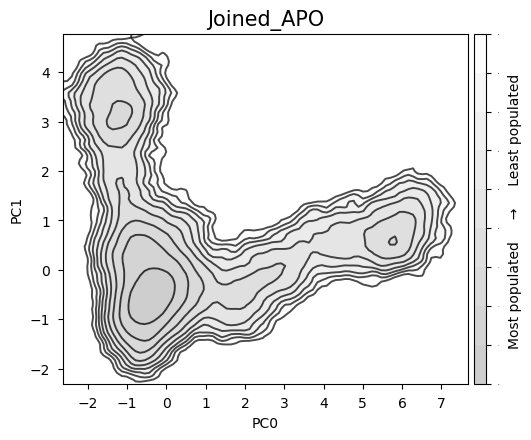

In [44]:
gc.collect()
fel_bnw_and_colored(pca_Y)

In [11]:
def plot_Nice_PES(P_test,P_test2,bins=100,sigma=3, title=False, size = 1):


    mpl.style.use("seaborn-paper")
    plt.figure(figsize=(10*size,10*size))
    alldata=np.vstack(P_test)
    min1=np.min(alldata[:,0])
    max1=np.max(alldata[:,0])
    min2=np.min(alldata[:,1])
    max2=np.max(alldata[:,1])
    
    tickspacing1=2.0
    tickspacing2=2.0
    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=bins)
    z += 0.1
    
    # compute free energies
    F = -np.log(z)
    
    
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]
    
    plt.xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=30*size)
    plt.yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=30*size)
    #    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.5,cmap=None, cbar=True,levels=levels,extent=extent)
    plt.contourf(data,alpha=0.3,cmap='gray', cbar=True,levels=levels,extent=extent)
    
    
    alldata2=np.vstack(P_test2)
    min12=np.min(alldata2[:,0])
    max12=np.max(alldata2[:,0])
    min22=np.min(alldata2[:,1])
    max22=np.max(alldata2[:,1])
    
    tickspacing12=1.0
    tickspacing22=1.0
    z2,x2,y2 = np.histogram2d(alldata2[:,0], alldata2[:,1], bins=bins)
    z2 += 0.1
    
    # compute free energies
    F2 = -np.log(z2)
    
    
    # contour plot
    extent2 = [x2[0], x2[-1], y2[0], y2[-1]]
    
    #plt.xticks(np.arange(int(min12), int(max12)+1, tickspacing12),fontsize=10*size)
    #plt.yticks(np.arange(int(min22), int(max22)+1, tickspacing22),fontsize=10*size)
    sigma = sigma # this depends on how noisy your data is, play with it!
    data2 = gaussian_filter((F2.T)*0.592-np.min(F2.T)*0.592, sigma)
    levels2=np.linspace(0,np.max(data2)-0.5,num=10)
    plt.contour(data2,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels2,extent=extent2)
    plt.contourf(data2,alpha=0.7,cmap='jet', cbar=True,levels=levels2,extent=extent2)
    
    
#     plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
#     cax = plt.axes([0.85, 0.1, 0.05, 0.7])

#     cbar = plt.colorbar(cax=cax, aspect=500)
#     cbar.set_ticks([])



/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_7124/1326009326.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn-paper")
/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_7124/1326009326.py:29: UserWarning: The following kwargs were not used by contour: 'cbar'
  plt.contour(data,colors='black',linestyles='solid',alpha=0.5,cmap=None, cbar=True,levels=levels,extent=extent)
/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_7124/1326009326.py:30: UserWarning: The following kwargs were not used by contour: 'cbar'
  plt.contourf(data,alpha=0.3,cmap='gray', cbar=True,levels=levels,extent=extent)
/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_7124/1326009326.py:56: UserWarning: The following kwargs w

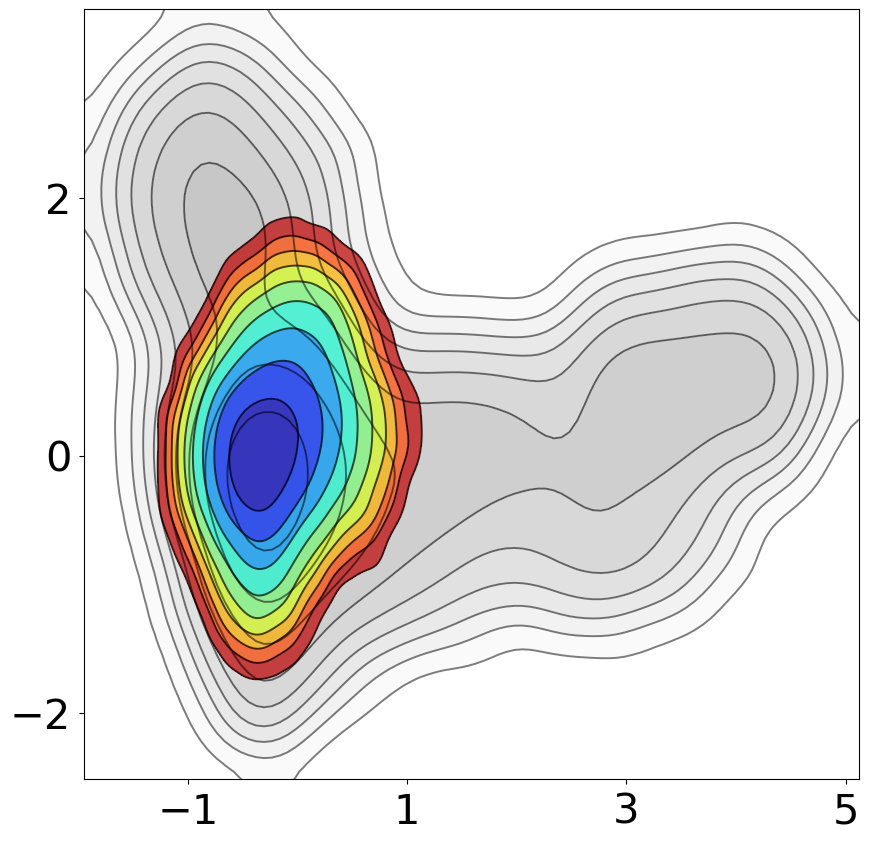

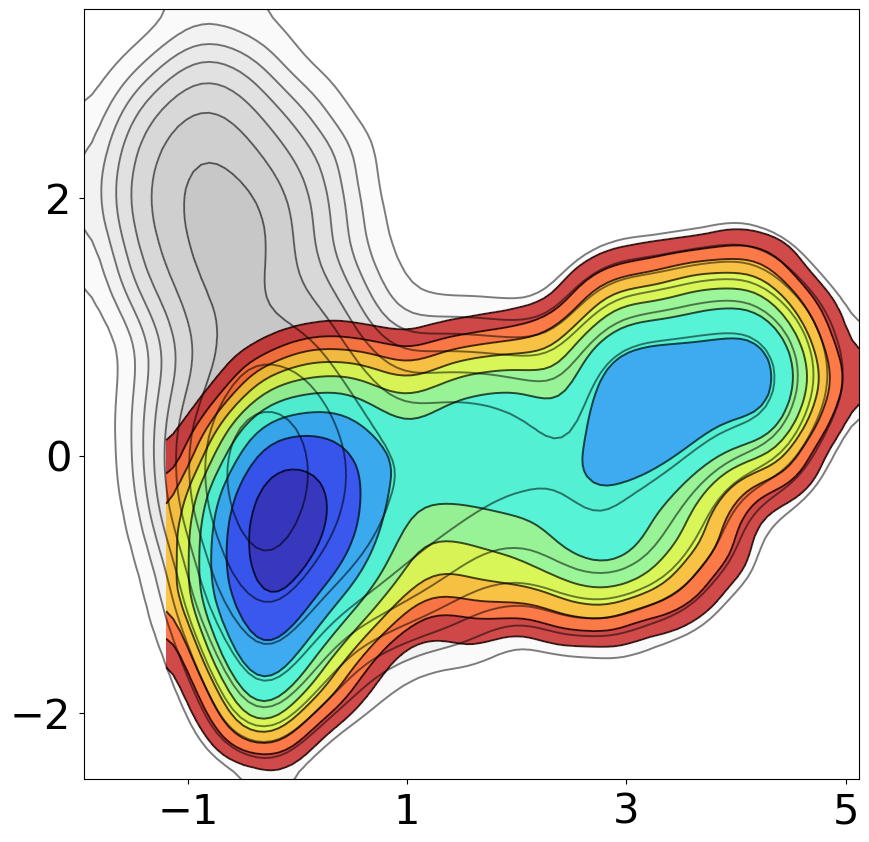

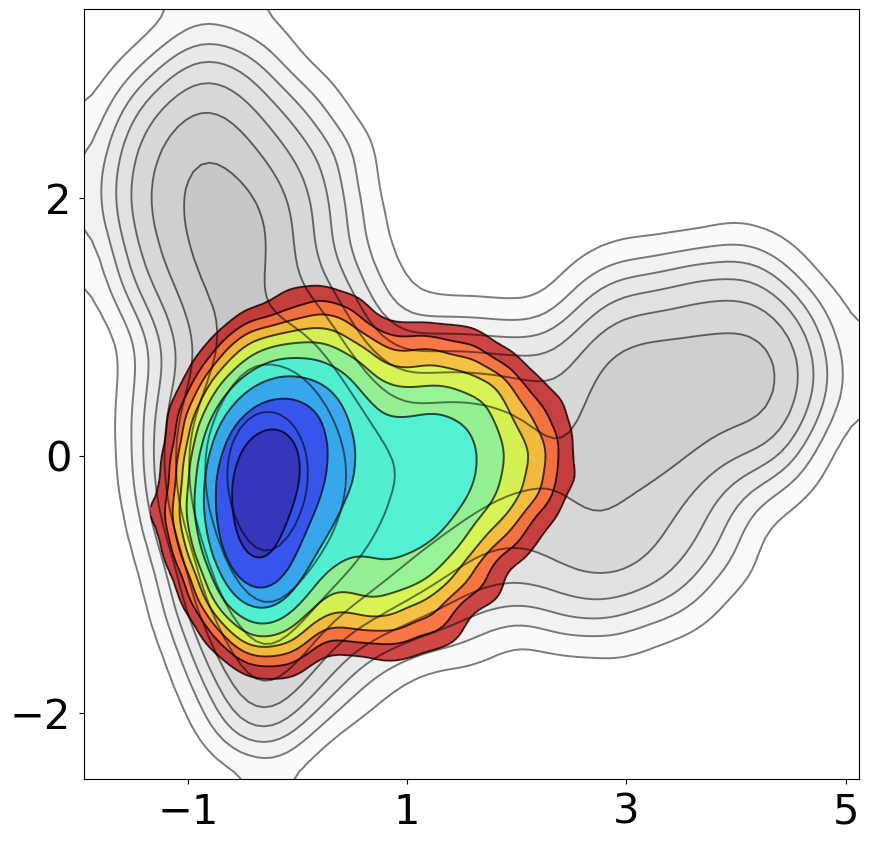

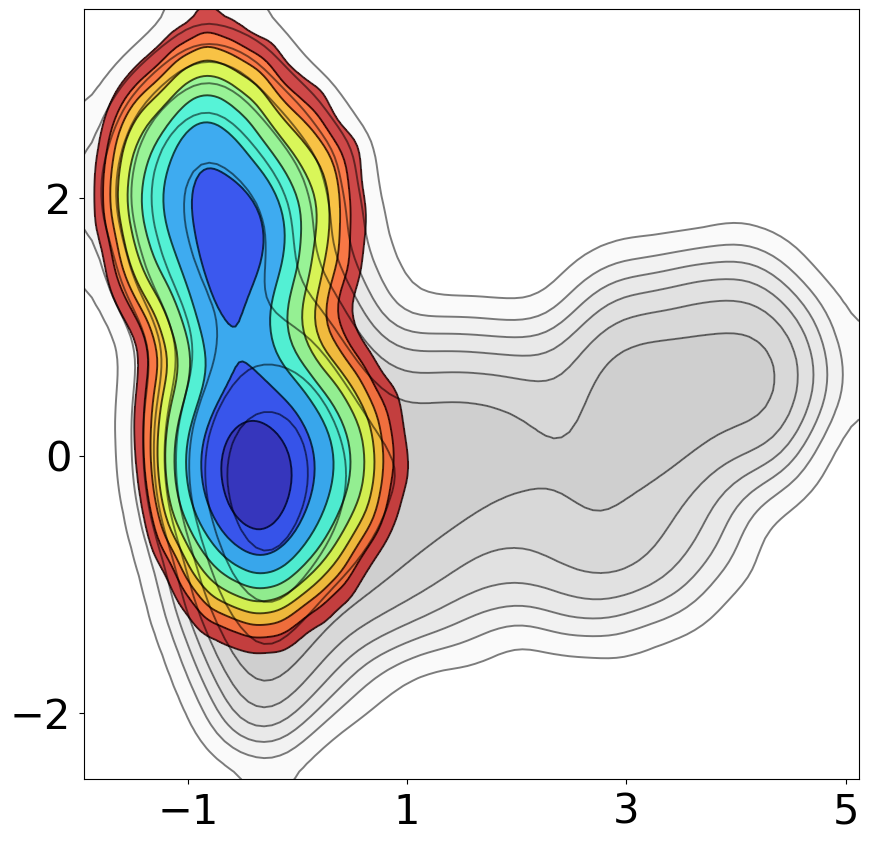

In [12]:
plot_Nice_PES(pca_Y,pca_HG3_apo)
plot_Nice_PES(pca_Y,pca_HG317_apo)
plot_Nice_PES(pca_Y,pca_HG317shell_apo)
plot_Nice_PES(pca_Y,pca_HG4_apo)

### Saving PCA's

In [9]:
pca_Y = pickle.load(open("/Volumes/Nia_HardDrive/HGs/PCA_Analysis/PCA_APO_Files/pca_joint_apo_bb.p", "rb"))
pca_HG3_apo = pickle.load(open("/Volumes/Nia_HardDrive/HGs/PCA_Analysis/PCA_APO_Files/pca_HG3_apo_bb.p", "rb"))
pca_HG317_apo = pickle.load(open("/Volumes/Nia_HardDrive/HGs/PCA_Analysis/PCA_APO_Files/pca_HG317_apo_bb.p", "rb"))
pca_HG317shell_apo = pickle.load(open("/Volumes/Nia_HardDrive/HGs/PCA_Analysis/PCA_APO_Files/pca_HG317shell_apo_bb.p", "rb"))
pca_HG4_apo = pickle.load(open("/Volumes/Nia_HardDrive/HGs/PCA_Analysis/PCA_APO_Files/pca_HG4_apo_bb.p", "rb"))

In [2]:
import matplotlib as mpl
import nglview as nv
import ipywidgets as widgets
import pytraj as pt
import warnings
import tqdm
warnings.filterwarnings("ignore")
%pylab inline
%matplotlib inline

def interactive_FEL2(pca_Y, trajfiles, topfile, output_plot=True, n_frames=100,output_structure=False, size=1, bins=90, sigma=0.99, pc1=0, pc2=1):
    '''
        
        Plot the Free Energy Surface(FES) of the given data in a matplotlib pyqt. User can select a point in the FES. 
        
                
        If you experience some problem or you have any comment with this function --> https://github.com/miqueleg/compbiolab :3
        
        Parameters: ---------------------------------------------------------------------------------
        
        data: 3D ndarray (MD,frames,tic_dim). If not, the calculations will be wrong!!
        
        trajfiles: 1D array containing all trajectories strings containing files path and name(order in the list is important)
        
        topfile: string containing file path and name for the .pdb file that will be used as topology.
        
        output_plot: If true, a plot including the FES and selected pint will be displayed at the end.
            default=True
            
        output_structure: If True,the selected structure is also returned as pytraj structure.
            default=False
            
        size: Float/Integer that defines the size of the plots
            default=1
            
        
        Returns: -------------------------------------------------------------------------------------------
        
        - nglview of the structure selected
        
        - If output_structure=True, the selected structure is also returned as pytraj structure
        
        Only in in jupyter-notebook
          
    '''
    ##This imports are kind of necessary in order to plot the graphic in the Tk canvas(PQt5).
    ## At the end of the function, the matplotlib inline canvas has to be setted again in order to do not disturbe next plots
    %matplotlib qt

    ##Plot the Free energy surface as Nice_PES function
    mpl.style.use("seaborn-paper")
    fig, ax = plt.subplots(figsize=(6*size,5*size))
    alldata=np.vstack(pca_Y)
    min1=np.min(alldata[:,pc1])
    max1=np.max(alldata[:,pc1])
    min2=np.min(alldata[:,pc2])
    max2=np.max(alldata[:,pc2])
    print(all_data.shape)

    tickspacing1=1.0
    tickspacing2=1.0
    z,x,y = np.histogram2d(alldata[:,pc1], alldata[:,pc2], bins=bins)
    z += 0.1

    # compute free energies
    F = -np.log(z)

    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]

    plt.xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=10*size)
    plt.yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=10*size)
    #    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=8)
    ax.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
    ax.contourf(data,alpha=0.5,cmap='jet', cbar=True,levels=levels,extent=extent)

    ##ginput will wait until a click is done into the plot and collect the coordinates into the x variable
    x = plt.ginput()


    #nodes are the prepared data corresponding of the points on the TICA scatter (tic0 and tic1 by default)
    nodes = np.array(list(zip(alldata[:,pc1],alldata[:,pc2])))
    node = np.array(x[0])
    #cdist finction computes the distance matrix between TICA nodes and node
    distances = np.array(cdist([node], nodes))
    #clicked frame is the position in the matrix distance in wich you can find the minimun value
    clicked_frames = np.argsort(distances)[0]
    clicked_frames = clicked_frames[:n_frames]
    MD_out = pt.Trajectory(top=topfile)
    
    for f in tqdm.tqdm(range(len(clicked_frames))):
        clicked_frame = clicked_frames[f]
        MD=pt.iterload(trajfiles, top=topfile)
        MD_out.append(MD[clicked_frame])

        #Frames is a list containing the len of all the MD's.
        #This forces the input TICA_test to have a 3D shape (MD,frames,tic_dim). If not, the calculations are wrong!!
        Frames = []
        for traj in pca_Y:
            Frames.append(len(traj))
        #In this loop is computed in wich MD and MD_frame you can find the clicked frame
        MD = 0
        Frame = clicked_frame
        for i in list(range(len(Frames))):
            sum_frames = sum([Frames[j] for j in list(range(len(Frames))) if j <= i])
            if clicked_frame <= sum_frames:
                MD = i
                Frame = clicked_frame - sum([Frames[j] for j in list(range(len(Frames))) if j < i])
                break
            else:
                continue
    #The selected_frame is displayed using pytraj and nglview
    MD=pt.iterload(trajfiles, top=topfile)
    view=nv.show_pytraj(MD)
    view.clear()
    view.add_cartoon(selection="protein")
    view.frame = int(clicked_frame)

    #returning to the matplotlib inline
    %matplotlib inline
    #plot the selected position with a scatter
    if output_plot:
        plt.figure(figsize=(6*size,5*size))
        plt.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
        plt.contourf(data,alpha=0.2,cmap='jet', cbar=True,levels=levels,extent=extent)
        plt.scatter(np.array(x)[:,0],np.array(x)[:,1], c ='b', s =50)
    if output_structure:
        return view, MD_out
    else:
        return view


AttributeError: 'super' object has no attribute '_ipython_display_'

(122400, 751)


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 61.22it/s]


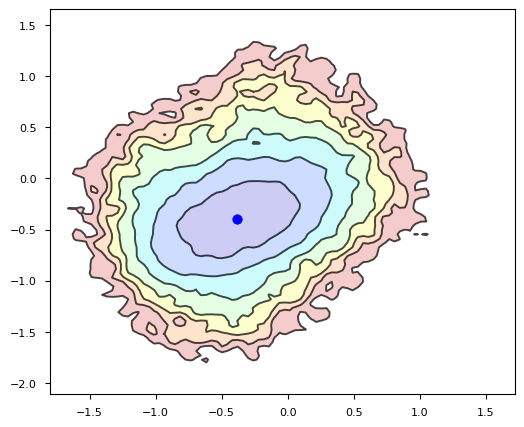

In [11]:
i = 0
view, frame = interactive_FEL2(pca_HG3_apo, trajfiles=trajfiles[i], topfile=topfiles[i], n_frames=1,pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])


In [8]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg3_apo_min.pdb', overwrite=True)

(122400, 751)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36.77it/s]


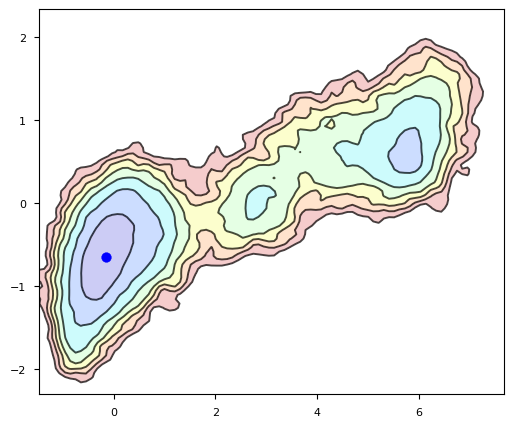

In [9]:
i = 1
view, frame = interactive_FEL2(pca_HG317_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])


In [10]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg317_apo_min1.pdb', overwrite=True)

(122400, 751)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.32it/s]


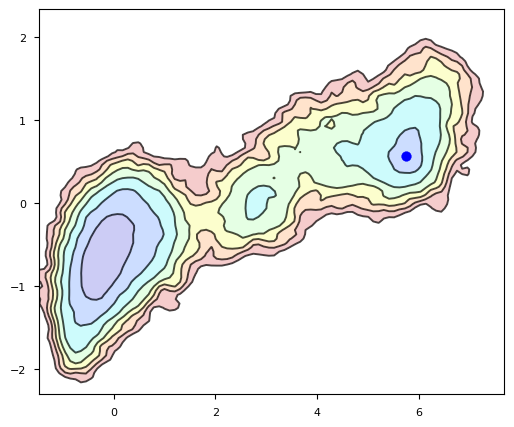

In [11]:
i = 1
view, frame = interactive_FEL2(pca_HG317_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])


In [12]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg317_apo_min2.pdb', overwrite=True)

(122400, 751)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.08it/s]


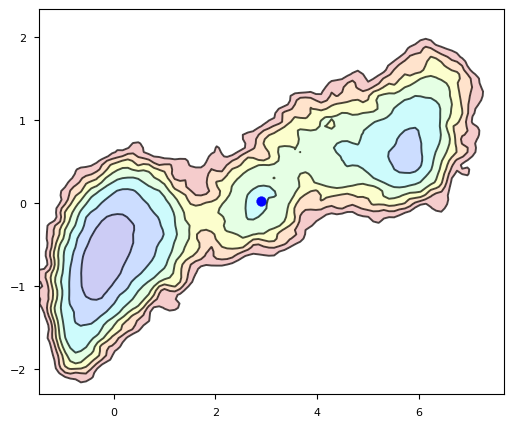

In [13]:
i = 1
view, frame = interactive_FEL2(pca_HG317_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [14]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg317_apo_min3.pdb', overwrite=True)

(122400, 751)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.68it/s]


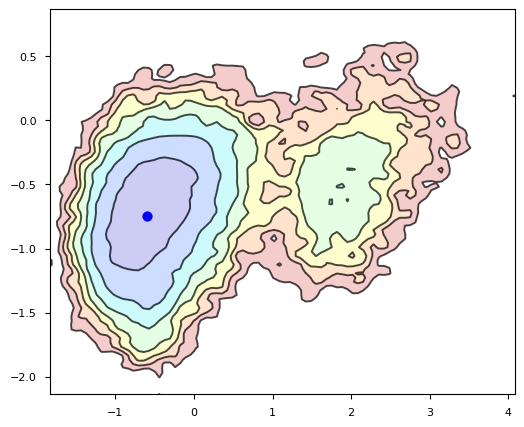

In [15]:
i = 2
view, frame = interactive_FEL2(pca_HG317shell_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [16]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg317shell_apo_min1.pdb', overwrite=True)

(122400, 751)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.61it/s]


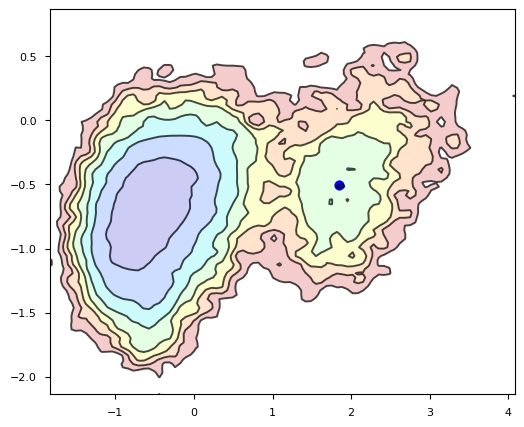

In [17]:
i = 2
view, frame = interactive_FEL2(pca_HG317shell_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [18]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg317shell_apo_min2.pdb', overwrite=True)

(122400, 751)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.17it/s]


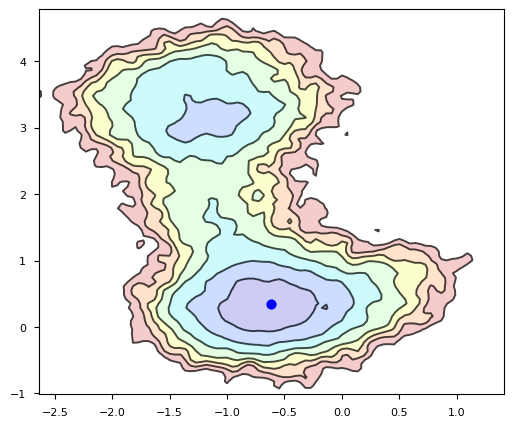

In [19]:
i = 3
view, frame = interactive_FEL2(pca_HG4_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [20]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg4_apo_min1.pdb', overwrite=True)

(122400, 751)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.99it/s]


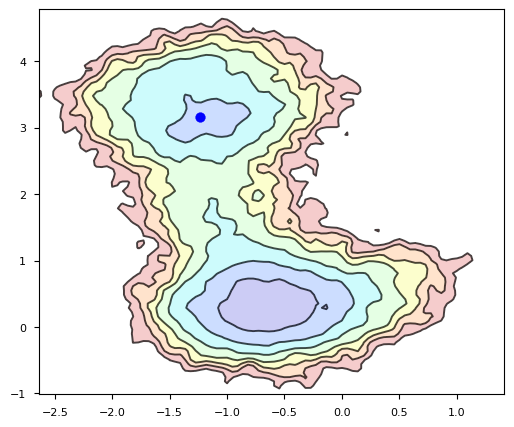

In [21]:
i = 3
view, frame = interactive_FEL2(pca_HG4_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [22]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg4_apo_min2.pdb', overwrite=True)

In [23]:
def PCA_RES_PYMOL(FEL):
    a = 0
    b = 1
    color1 = input('Enter a color for PC0:')
    color2 = input('Enter a color for PC1:')
    with open('PYSETS/PCA_HG_APO_HEAVY_JOINT.pml', 'w') as f:    
        dist_PCA_correl = pca_joint.feature_PC_correlation
        for ii, icorr in enumerate(dist_PCA_correl.T):
            if ii == a:
                f.write("For PCA %u"%ii + '\n')
                argmaxs = [ii for ii in np.abs(icorr).argsort()[::-1] if not np.isnan(icorr[ii])]
                for art in argmaxs[:10]:
                    line0 = (feats[0].describe()[art]).split(' ')
                    f.write('color '+ color1+', resi '+line0[1]+'\n')
                    f.write('show sticks, resi '+ line0[1]+' \n')
            if ii == b:
                f.write("For PCA %u"%ii+'\n')
                argmaxs = [ii for ii in np.abs(icorr).argsort()[::-1] if not np.isnan(icorr[ii])]
                for art in argmaxs[:10]:
                    line1 = (feats[0].describe()[art]).split(' ')
                    f.write('color '+ color2+', resi '+ line1[1]+'\n')
                    f.write('show sticks, resi '+ line1[1]+' \n')

In [40]:
PCA_RES_PYMOL(pca_Y)

Enter a color for PC0: cyan
Enter a color for PC1: magenta


(122400, 751)


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 48.38it/s]


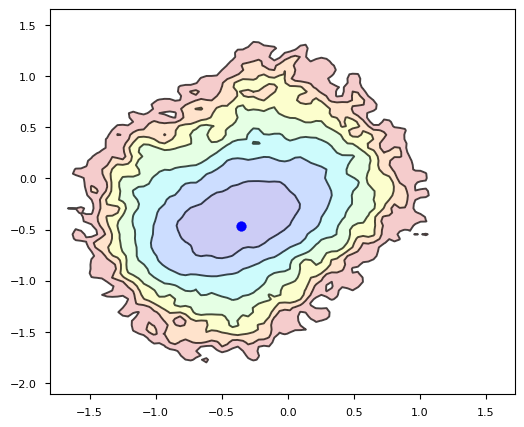

In [13]:
i = 0
view, frame = interactive_FEL2(pca_HG3_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [14]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg3_apo_min1.dcd', overwrite=True)

(122400, 751)


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 50.15it/s]


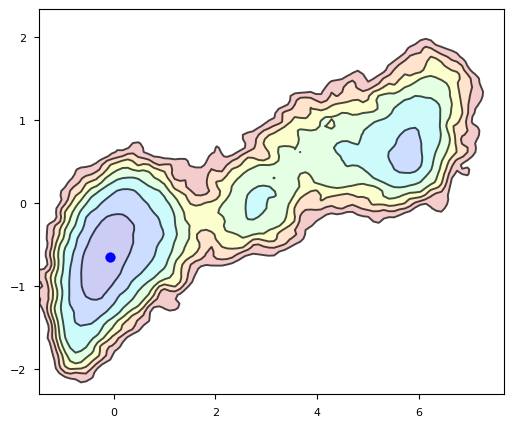

In [15]:
i = 1
view, frame = interactive_FEL2(pca_HG317_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [16]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg317_apo_min1.dcd', overwrite=True)

(122400, 751)


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 50.33it/s]


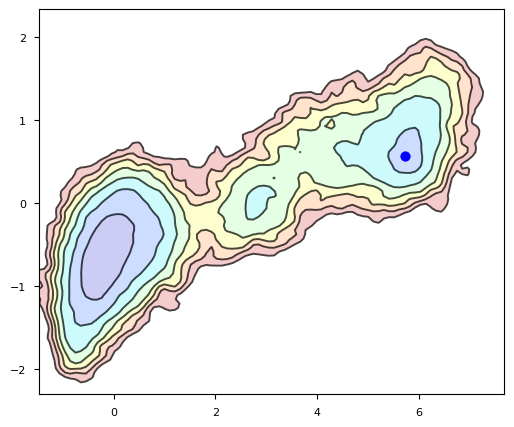

In [17]:
i = 1
view, frame = interactive_FEL2(pca_HG317_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [18]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg317_apo_min2.dcd', overwrite=True)

(122400, 751)


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 54.15it/s]


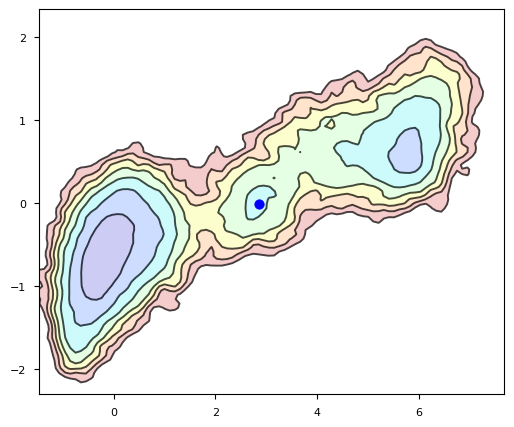

In [19]:
i = 1
view, frame = interactive_FEL2(pca_HG317_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [20]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg317_apo_min3.dcd', overwrite=True)

(122400, 751)


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 51.84it/s]


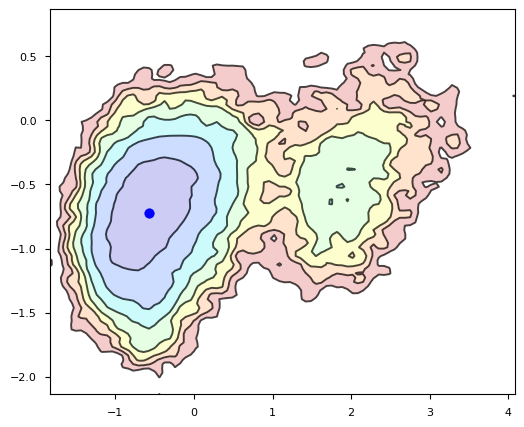

In [21]:
i = 2
view, frame = interactive_FEL2(pca_HG317shell_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [22]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg317shell_apo_min1.dcd', overwrite=True)

(122400, 751)


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 48.24it/s]


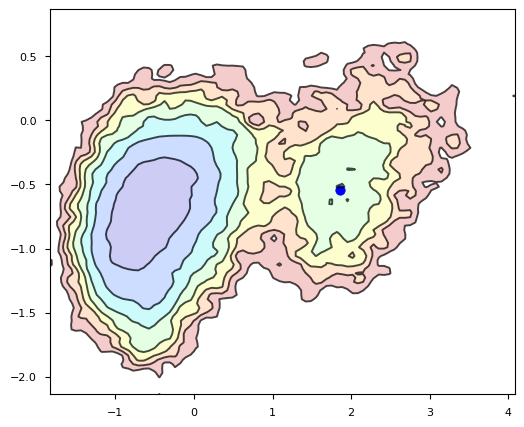

In [23]:
i = 2
view, frame = interactive_FEL2(pca_HG317shell_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [24]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg317shell_apo_min2.dcd', overwrite=True)

(122400, 751)


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 49.94it/s]


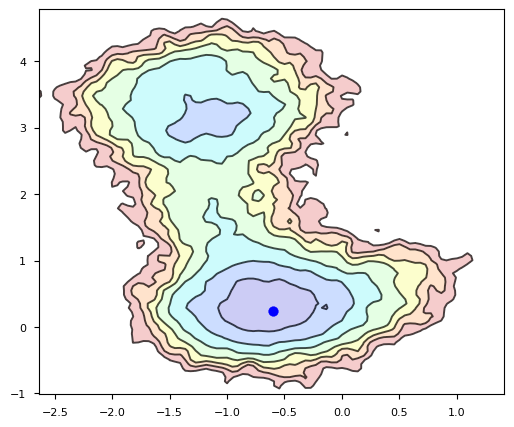

In [25]:
i = 3
view, frame = interactive_FEL2(pca_HG4_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])

In [26]:
selected.append(frame)
selected.save('FEL_FRAMES/PCA_APO_HEAVY_JOINT/hg4_apo_min1.dcd', overwrite=True)

(122400, 751)


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 48.14it/s]


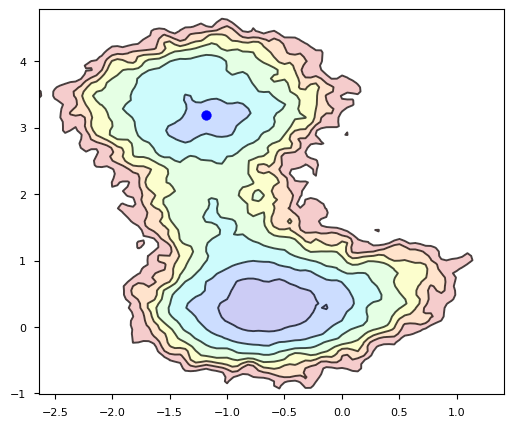

In [27]:
i = 3
view, frame = interactive_FEL2(pca_HG4_apo, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])